# Import libraries & data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
%matplotlib inline

In [3]:
# Importing US states json
country_geo = '/Users/katherinevaldivia/Desktop/Career Foundry Data Analytics Course work/Data Analytics Immersion/Achievement 6/Citi Bike Analysis/02 Data/us-states.json'
country_geo

'/Users/katherinevaldivia/Desktop/Career Foundry Data Analytics Course work/Data Analytics Immersion/Achievement 6/Citi Bike Analysis/02 Data/us-states.json'

In [4]:
#Import NYC geojson
city_geo = '/Users/katherinevaldivia/Desktop/Career Foundry Data Analytics Course work/Data Analytics Immersion/Achievement 6/Citi Bike Analysis/02 Data/NYC.geojson '
city_geo

'/Users/katherinevaldivia/Desktop/Career Foundry Data Analytics Course work/Data Analytics Immersion/Achievement 6/Citi Bike Analysis/02 Data/NYC.geojson '

In [5]:
# Import NYC zipcode geojson
city_geo2 = '/Users/katherinevaldivia/Desktop/Career Foundry Data Analytics Course work/Data Analytics Immersion/Achievement 6/Citi Bike Analysis /02 Data/nyc-zip-code-tabulation-areas-polygons.geojson'
city_geo2

'/Users/katherinevaldivia/Desktop/Career Foundry Data Analytics Course work/Data Analytics Immersion/Achievement 6/Citi Bike Analysis /02 Data/nyc-zip-code-tabulation-areas-polygons.geojson'

In [6]:
# Import citibike csv 
# create shortcut
path = '/Users/katherinevaldivia/Desktop/Career Foundry Data Analytics Course work/Data Analytics Immersion/Achievement 6/Citi Bike Analysis '
path


'/Users/katherinevaldivia/Desktop/Career Foundry Data Analytics Course work/Data Analytics Immersion/Achievement 6/Citi Bike Analysis '

In [7]:
citidf = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibikeclean.csv'), index_col = False)

# Wrangling & cleaning data

In [8]:
citidf.head()

,Unnamed: 0,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,0,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,female
1,1,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,male
2,2,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,male
3,3,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,female
4,5,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,female


In [9]:
citidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               42993 non-null  int64  
 1   weekday                  42993 non-null  object 
 2   start_hour               42993 non-null  int64  
 3   start_time               42993 non-null  object 
 4   start_station_id         42993 non-null  int64  
 5   start_station_name       42993 non-null  object 
 6   start_station_latitude   42993 non-null  float64
 7   start_station_longitude  42993 non-null  float64
 8   end_time                 42993 non-null  object 
 9   end_station_id           42993 non-null  int64  
 10  end_station_name         42993 non-null  object 
 11  end_station_latitude     42993 non-null  float64
 12  end_station_longitude    42993 non-null  float64
 13  trip_duration            42993 non-null  int64  
 14  subscriber            

In [10]:
# Checking how many rides occured at each station
station_counts = citidf.groupby('start_station_id')['start_time'].count().reset_index()
station_counts

,start_station_id,start_time
0,72,158
1,79,122
2,82,59
3,83,72
4,116,269
...,...,...
325,2017,90
326,2021,150
327,2022,96
328,2023,74


In [11]:
station_counts.head(20)

,start_station_id,start_time
0,72,158
1,79,122
2,82,59
3,83,72
4,116,269
5,119,7
6,120,25
7,127,253
8,128,264
9,137,76


In [12]:
station_counts.min()

start_station_id    72
start_time           3
dtype: int64

In [13]:
station_counts.max()

start_station_id    3002
start_time           475
dtype: int64

In [14]:
station_counts.mean()

start_station_id    447.809091
start_time          130.281818
dtype: float64

In [15]:
station_counts_day = citidf.groupby(['start_station_id', 'weekday'])['start_time'].count()
station_counts_day

start_station_id  weekday
72                Fri        31
                  Mon        23
                  Sat        23
                  Sun        25
                  Thu        21
                             ..
3002              Sat        37
                  Sun        39
                  Thu        20
                  Tue        26
                  Wed        31
Name: start_time, Length: 2276, dtype: int64

In [16]:
station_counts_day.head(20)

start_station_id  weekday
72                Fri        31
                  Mon        23
                  Sat        23
                  Sun        25
                  Thu        21
                  Tue        16
                  Wed        19
79                Fri        22
                  Mon        15
                  Sat        13
                  Sun        11
                  Thu        24
                  Tue        16
                  Wed        21
82                Fri         6
                  Mon        12
                  Sat         6
                  Sun        11
                  Thu         6
                  Tue         8
Name: start_time, dtype: int64

<Axes: ylabel='Count'>

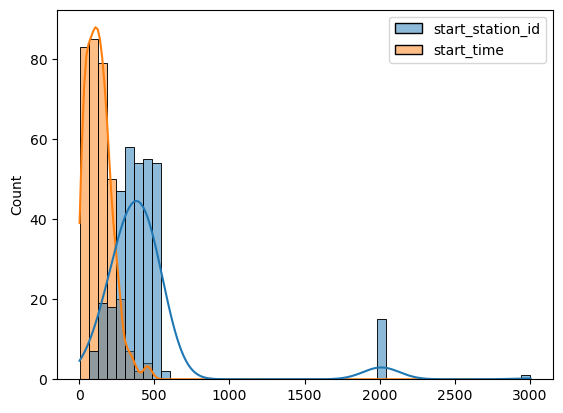

In [17]:
#visualizing station counts
sns.histplot(station_counts, bins=50, kde = True) 

In [18]:
# select only needed columns
columns = ["weekday","start_hour","start_station_id","start_station_longitude","start_station_latitude","start_time"]

In [19]:
citidf_2 = citidf[columns]

In [20]:
citidf_2.head()

,weekday,start_hour,start_station_id,start_station_longitude,start_station_latitude,start_time
0,Mon,18,523,-73.991382,40.754666,2013-09-09 18:18:55
1,Thu,18,257,-74.002472,40.719392,2013-09-12 18:38:53
2,Wed,19,479,-73.991255,40.760193,2013-09-18 19:44:04
3,Sat,11,527,-73.974347,40.743156,2013-09-28 11:54:37
4,Fri,22,293,-73.990765,40.730287,2013-09-27 22:01:01


In [21]:
citidf_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   weekday                  42993 non-null  object 
 1   start_hour               42993 non-null  int64  
 2   start_station_id         42993 non-null  int64  
 3   start_station_longitude  42993 non-null  float64
 4   start_station_latitude   42993 non-null  float64
 5   start_time               42993 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 2.0+ MB


In [22]:
# Checking for missing values within df

citidf_2.isnull().sum()

weekday                    0
start_hour                 0
start_station_id           0
start_station_longitude    0
start_station_latitude     0
start_time                 0
dtype: int64

In [23]:
# Defining data type for start_time column
data_types = {
    'start_time': 'datetime64'
}

In [24]:
file_path = os.path.join(path, '02 Data','Prepared Data','citibikeclean.csv')

In [25]:
parse_dates = ['start_time']

In [26]:
citidf = pd.read_csv(file_path, parse_dates=parse_dates)

In [27]:
citidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               42993 non-null  int64         
 1   weekday                  42993 non-null  object        
 2   start_hour               42993 non-null  int64         
 3   start_time               42993 non-null  datetime64[ns]
 4   start_station_id         42993 non-null  int64         
 5   start_station_name       42993 non-null  object        
 6   start_station_latitude   42993 non-null  float64       
 7   start_station_longitude  42993 non-null  float64       
 8   end_time                 42993 non-null  object        
 9   end_station_id           42993 non-null  int64         
 10  end_station_name         42993 non-null  object        
 11  end_station_latitude     42993 non-null  float64       
 12  end_station_longitude    42993 n

In [28]:
# Calculating rides per day for each station
station_daily_counts = citidf.groupby(['start_station_id', citidf['start_time'].dt.date])['start_time'].count()

In [29]:
#rides taken each day at each station
station_daily_counts.head(20)

start_station_id  start_time
72                2013-09-02     3
                  2013-09-03     1
                  2013-09-04     4
                  2013-09-05     8
                  2013-09-06    10
                  2013-09-07     6
                  2013-09-08     7
                  2013-09-09     5
                  2013-09-10     7
                  2013-09-11     7
                  2013-09-12     7
                  2013-09-13     7
                  2013-09-14     7
                  2013-09-15     8
                  2013-09-16     4
                  2013-09-17     4
                  2013-09-19     1
                  2013-09-20     6
                  2013-09-21     5
                  2013-09-22     5
Name: start_time, dtype: int64

In [30]:
# average rides per day by start station
station_avg_rides_per_day = station_daily_counts.groupby('start_station_id').mean().reset_index()

In [31]:
#checking 
station_avg_rides_per_day

,start_station_id,start_time
0,72,5.642857
1,79,4.357143
2,82,2.185185
3,83,2.571429
4,116,8.966667
...,...,...
325,2017,3.000000
326,2021,5.357143
327,2022,3.310345
328,2023,3.217391


In [32]:
# Renaming column name
station_avg_rides_per_day= station_avg_rides_per_day.rename(columns={'start_time':'average_daily_rides'})

In [33]:
#merging data sets
station_avg_rides_per_day.head()

,start_station_id,average_daily_rides
0,72,5.642857
1,79,4.357143
2,82,2.185185
3,83,2.571429
4,116,8.966667


In [34]:
#merging data sets
citidf_2.head()

,weekday,start_hour,start_station_id,start_station_longitude,start_station_latitude,start_time
0,Mon,18,523,-73.991382,40.754666,2013-09-09 18:18:55
1,Thu,18,257,-74.002472,40.719392,2013-09-12 18:38:53
2,Wed,19,479,-73.991255,40.760193,2013-09-18 19:44:04
3,Sat,11,527,-73.974347,40.743156,2013-09-28 11:54:37
4,Fri,22,293,-73.990765,40.730287,2013-09-27 22:01:01


In [35]:
#checking shape
station_avg_rides_per_day.shape

(330, 2)

In [36]:
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

In [37]:
# latitude and longitude for each station
station_loc = citidf.groupby('start_station_id')[['start_station_latitude', 'start_station_longitude']].mean()
station_loc

,start_station_latitude,start_station_longitude
start_station_id,,
72,40.767272,-73.993929
79,40.719116,-74.006667
82,40.711174,-74.000165
83,40.683826,-73.976323
116,40.741776,-74.001497
...,...,...
2017,40.750224,-73.971214
2021,40.759291,-73.988597
2022,40.758491,-73.959206


In [38]:
citidf_merged = station_loc.merge(station_avg_rides_per_day, on = 'start_station_id')
citidf_merged

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides
0,72,40.767272,-73.993929,5.642857
1,79,40.719116,-74.006667,4.357143
2,82,40.711174,-74.000165,2.185185
3,83,40.683826,-73.976323,2.571429
4,116,40.741776,-74.001497,8.966667
...,...,...,...,...
325,2017,40.750224,-73.971214,3.000000
326,2021,40.759291,-73.988597,5.357143
327,2022,40.758491,-73.959206,3.310345
328,2023,40.759681,-73.970314,3.217391


In [39]:
citidf_to_plot = citidf_merged[['start_station_id','average_daily_rides',]]
citidf_to_plot.head()

,start_station_id,average_daily_rides
0,72,5.642857
1,79,4.357143
2,82,2.185185
3,83,2.571429
4,116,8.966667


In [40]:
citidf_to_plot2 = citidf_merged[['start_station_longitude','start_station_latitude','average_daily_rides',]]
citidf_to_plot2.head()

,start_station_longitude,start_station_latitude,average_daily_rides
0,-73.993929,40.767272,5.642857
1,-74.006667,40.719116,4.357143
2,-74.000165,40.711174,2.185185
3,-73.976323,40.683826,2.571429
4,-74.001497,40.741776,8.966667


In [41]:
citidf_merged['average_daily_rides'].min()

1.0

In [42]:
citidf_merged['average_daily_rides'].max()

15.833333333333334

In [43]:
citidf_merged['average_daily_rides'].mean()

4.609605418741775

<Axes: xlabel='average_daily_rides', ylabel='Count'>

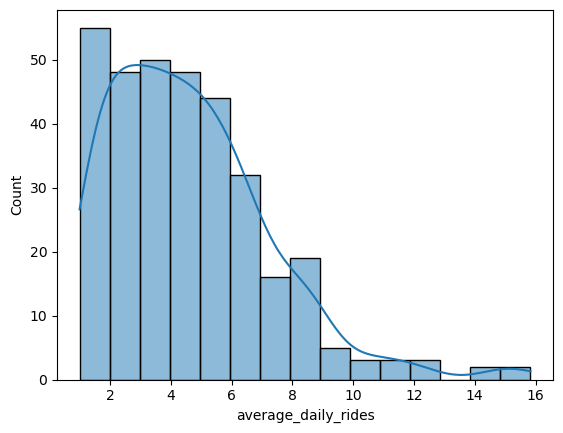

In [44]:
sns.histplot(citidf_merged['average_daily_rides'], bins=15, kde = True)

# Creating choropleth maps

In [45]:
# trying to display NYC map
nyc_map

In [46]:
# importing libraries
import folium
import geopandas as gpd
from shapely.geometry import Point

In [47]:
start_station_id.forEach(station => {
  var marker = new mapboxgl.Marker()
    .setLngLat([start_station)longitude.longitude, start_station_latitude.latitude])
    .addTo(nyc_map);
});

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (1329922472.py, line 3)

In [48]:
citidf_to_plot2.head()

,start_station_longitude,start_station_latitude,average_daily_rides
0,-73.993929,40.767272,5.642857
1,-74.006667,40.719116,4.357143
2,-74.000165,40.711174,2.185185
3,-73.976323,40.683826,2.571429
4,-74.001497,40.741776,8.966667


In [49]:
citidf_to_plot3 = citidf_merged[['start_station_longitude','start_station_latitude']]

In [50]:
citidf_to_plot3

,start_station_longitude,start_station_latitude
0,-73.993929,40.767272
1,-74.006667,40.719116
2,-74.000165,40.711174
3,-73.976323,40.683826
4,-74.001497,40.741776
...,...,...
325,-73.971214,40.750224
326,-73.988597,40.759291
327,-73.959206,40.758491
328,-73.970314,40.759681


In [51]:
citidf_to_plot3.head()

,start_station_longitude,start_station_latitude
0,-73.993929,40.767272
1,-74.006667,40.719116
2,-74.000165,40.711174
3,-73.976323,40.683826
4,-74.001497,40.741776


In [52]:
import folium
from folium.plugins import MarkerCluster

In [53]:
map_zip = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)

In [54]:
choropleth_layer = folium.Choropleth(
    geo_data= city_geo2,
    name="Choropleth Map"
).add_to(map_zip)

In [55]:
folium.LayerControl().add_to(map_zip)

In [56]:
#creating zipcode layer 
map_zip

In [57]:
citidf_merged

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides
0,72,40.767272,-73.993929,5.642857
1,79,40.719116,-74.006667,4.357143
2,82,40.711174,-74.000165,2.185185
3,83,40.683826,-73.976323,2.571429
4,116,40.741776,-74.001497,8.966667
...,...,...,...,...
325,2017,40.750224,-73.971214,3.000000
326,2021,40.759291,-73.988597,5.357143
327,2022,40.758491,-73.959206,3.310345
328,2023,40.759681,-73.970314,3.217391


In [58]:
citidf_merged.to_csv(os.path.join(path, '02 Data','Prepared Data', 'citibike_station.csv'))

In [59]:
# Loop through bike stations
for index, row in citidf_merged.iterrows():
    folium.Marker(
        location=[row["start_station_latitude"], row["start_station_longitude"]],
        popup=row["start_station_id"],
        icon=folium.Icon(color="orange", icon="bicycle")
    ).add_to(map_zip)


In [60]:
# Adding a layer control
folium.LayerControl().add_to(map_zip)

In [61]:
#taking a look at the NYC map with the changes
map_zip

In [62]:
import folium
import geopandas as gpd
from shapely.geometry import Point

In [63]:
ziparea_geojson =  '/Users/katherinevaldivia/Desktop/Career Foundry Data Analytics Course work/Data Analytics Immersion/Achievement 6/Citi Bike Analysis /02 Data/nyc-zip-code-tabulation-areas-polygons.geojson'

In [64]:
geojson_gdf = gpd.read_file(ziparea_geojson)

In [65]:
# Converting bike station DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(citidf_merged["start_station_longitude"], citidf_merged["start_station_latitude"])]
bike_stations_gdf = gpd.GeoDataFrame(citidf_merged, geometry=geometry, crs=geojson_gdf.crs)

In [66]:
merged_gdf = gpd.sjoin(bike_stations_gdf, geojson_gdf, predicate="within")
merged_gdf

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides,geometry,index_right,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostalCode,Shape_Leng,Shape_Area,@id
0,72,40.767272,-73.993929,5.642857,POINT (-73.99393 40.76727),203,204,10019,New York,NY,Manhattan,36,061,0,24983.441628,1.882838e+07,http://nyc.pediacities.com/Resource/PostalCode...
24,173,40.760647,-73.984427,5.233333,POINT (-73.98443 40.76065),203,204,10019,New York,NY,Manhattan,36,061,0,24983.441628,1.882838e+07,http://nyc.pediacities.com/Resource/PostalCode...
75,281,40.764397,-73.973715,5.300000,POINT (-73.97371 40.76440),203,204,10019,New York,NY,Manhattan,36,061,0,24983.441628,1.882838e+07,http://nyc.pediacities.com/Resource/PostalCode...
138,352,40.763406,-73.977225,5.500000,POINT (-73.97722 40.76341),203,204,10019,New York,NY,Manhattan,36,061,0,24983.441628,1.882838e+07,http://nyc.pediacities.com/Resource/PostalCode...
202,422,40.770513,-73.988038,4.620690,POINT (-73.98804 40.77051),203,204,10019,New York,NY,Manhattan,36,061,0,24983.441628,1.882838e+07,http://nyc.pediacities.com/Resource/PostalCode...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,2021,40.759291,-73.988597,5.357143,POINT (-73.98860 40.75929),105,106,10036,New York,NY,Manhattan,36,061,0,16418.606668,1.139511e+07,http://nyc.pediacities.com/Resource/PostalCode...
273,499,40.769155,-73.981918,9.100000,POINT (-73.98192 40.76916),89,90,10023,New York,NY,Manhattan,36,061,0,22471.385989,1.521271e+07,http://nyc.pediacities.com/Resource/PostalCode...
309,538,40.757952,-73.977876,2.965517,POINT (-73.97788 40.75795),110,111,10020,New York,NY,Manhattan,36,061,0,3612.203611,6.972970e+05,http://nyc.pediacities.com/Resource/PostalCode...
320,2006,40.765909,-73.976342,4.482759,POINT (-73.97634 40.76591),82,83,00083,Central Park,NY,Manhattan,36,061,0,32710.772800,3.830099e+07,http://nyc.pediacities.com/Resource/PostalCode...


In [67]:
#dropping unnecessary columns from the merged gdf
merged_gdf2 = merged_gdf.drop(columns=["geometry","index_right","OBJECTID","PO_NAME","STATE","borough","ST_FIPS","CTY_FIPS","BLDGpostalCode","Shape_Leng","Shape_Area","@id"])

In [68]:
#Making sure unnecessary columns were dropped
merged_gdf2

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides,postalCode
0,72,40.767272,-73.993929,5.642857,10019
24,173,40.760647,-73.984427,5.233333,10019
75,281,40.764397,-73.973715,5.300000,10019
138,352,40.763406,-73.977225,5.500000,10019
202,422,40.770513,-73.988038,4.620690,10019
...,...,...,...,...,...
326,2021,40.759291,-73.988597,5.357143,10036
273,499,40.769155,-73.981918,9.100000,10023
309,538,40.757952,-73.977876,2.965517,10020
320,2006,40.765909,-73.976342,4.482759,00083


In [69]:
#Creating choropleth map with avg daily rides and postal codes
choropleth_layer = folium.Choropleth(
    geo_data=ziparea_geojson,
    data=merged_gdf2,
    columns=["postalCode", "average_daily_rides"],
    key_on="feature.properties.postalCode",  
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Average Daily Use"
).add_to(nyc_map)

In [70]:
#Taking a look at the NYC map with the changes
nyc_map

In [71]:
# displaying bike stations
for index, row in citidf_merged.iterrows():
    folium.Marker(
        location=[row["start_station_latitude"], row["start_station_longitude"]],
        popup=row["start_station_id"],
        icon=folium.Icon(color="red", icon="bicycle")
    ).add_to(nyc_map)

In [72]:
# Making sure it was successful
nyc_map

In [73]:
#Saving map
nyc_map.save('plot_data.html')

In [74]:
#taking a look at citidf 
citidf.head()

,Unnamed: 0,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,0,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,female
1,1,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,male
2,2,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,male
3,3,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,female
4,5,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,female


In [75]:
#Saving prepared citidf
citidf.to_csv(os.path.join(path, '02 Data','Prepared Data', 'citibikeclean_2.csv'))

In [76]:
#taking a look at merged_gdf2 one more time
merged_gdf2.head()

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides,postalCode
0,72,40.767272,-73.993929,5.642857,10019
24,173,40.760647,-73.984427,5.233333,10019
75,281,40.764397,-73.973715,5.300000,10019
138,352,40.763406,-73.977225,5.500000,10019
202,422,40.770513,-73.988038,4.620690,10019


In [77]:
#Saving prepared merged_gdf2
merged_gdf2.to_csv(os.path.join(path, '02 Data','Prepared Data', 'NYC_codes.csv'))

## Does the analysis answer any of your existing research questions?

### -The analysis did answer my existing research questions. Buy using the choropleth map I was able to see exactly where the busiest stations are within zipcodes by looking at average daily usage.

## Does the analysis lead you to any new research questions?

### -Not at this time